# DAV 6150 Module 11 Assignment - Decision Trees & Random Forests
Brian Livian, Alejandra Zapata, Ke Chen

## 1. Introduction 
The data set regarding physical characteristics of mushrooms from https://archive.ics.uci.edu/ml/datasets/mushroom will be used to determine the most ideal features to predict the response variable veil color. A veil is a structure found on mushrooms which is a useful feature in mushroom identification. It is also an important feature as it may be an indicator of a lethal fungi[link: https://en.wikipedia.org/wiki/Universal_veil].

The planned steps will be addressed below:

- 1. Perform exploratory data analysis and general overview of the data set.
- 2. Deal with the missing values and outliers, as needed.
- 3. Based on the EDA results, select/combine the features to reduce the numbers of the explanatory variables and furthermore apply feature selection algorithms to confirm our knowledge from the EDA or find a better set of features.
- 4. Applying the reduced features to perform decision tree and random forest algorithm, the performance of the model will be evaluated by classification metrics and we will select the best model.

In [1]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

warnings.filterwarnings('ignore')

# read data as data frame
clm=["poison-edible",'cap-shape','cap-surface', 
     'cap-color', 'bruises', 'odor', 'gill-attachment','gill-spacing', 
     'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
     'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
     'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population','habitat']
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
# check result
df.head()

,poison-edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2. Exploratory Data Analysis
According to the introduction of the data set source https://archive.ics.uci.edu/ml/datasets/mushroom, the meanings of all variables can be described as below.
- 1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- 2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- 3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- 4. bruises?: bruises=t,no=f
- 5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- 6. gill-attachment: attached=a,descending=d,free=f,notched=n
- 7. gill-spacing: close=c,crowded=w,distant=d
- 8. gill-size: broad=b,narrow=n
- 9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- 10. stalk-shape: enlarging=e,tapering=t
- 11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- 12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- 13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- 14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- 15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- 16. veil-type: partial=p,universal=u
- 17. veil-color: brown=n,orange=o,white=w,yellow=y
- 18. ring-number: none=n,one=o,two=t
- 19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- 20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- 21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- 22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

So we can conclude all the data are nominal categorical variables. The veil-color will be the response variable, while the others will be used as explanatory variables candidates.

In [2]:
# general info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poison-edible             8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The basic information of the data set shows total 8124 observations with no null values.
#### Plots of all variables

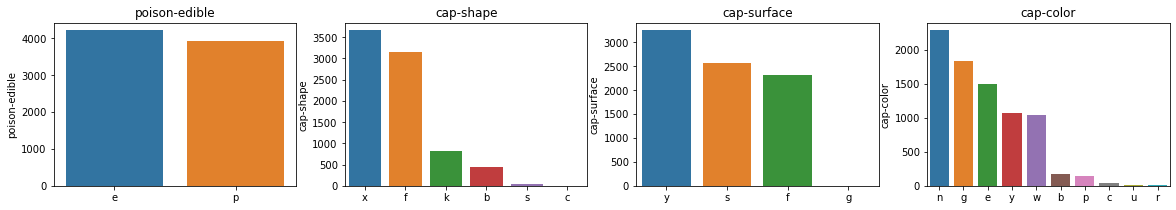

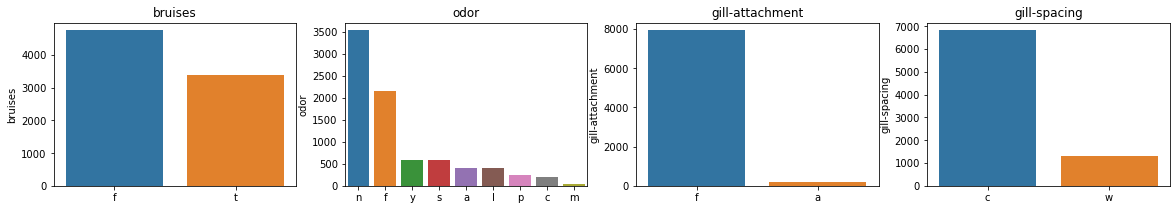

In [3]:
# import library for plotting barplots of all variables
import seaborn as sns

# variables 1-8
figure(figsize=(20, 3))
for i in range(0,4):
    plt.subplot(1, 4, i+1)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(4,8):
    plt.subplot(1, 4, i-3)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

In these eight variables, the gill-attachment and gill-spacing shows very imbalanced pattern. Sunken and conical cap-shapes and groove cap-surface has very few observations. Cap-color and odor has more than 5 categories. Some categories has very few observations.

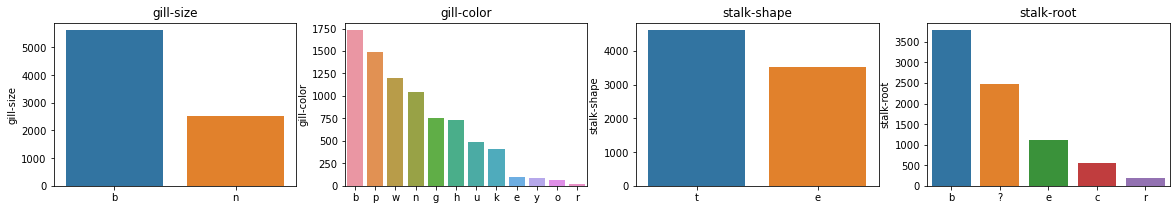

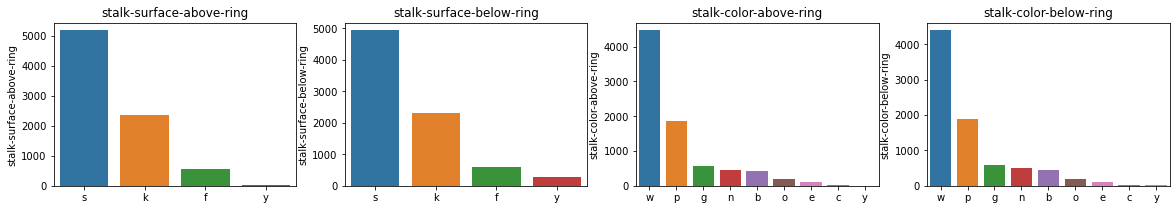

In [4]:
# variables from 9-16
figure(figsize=(20, 3))
for i in range(8,12):
    plt.subplot(1, 4, i-7)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(12,16):
    plt.subplot(1, 4, i-11)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

Gill-color has the most categories, with some categories has fewer values. Interestingly, stalk-color-above-ring and stalk-color-below-ring has almost the same pattern, both have many categories but some have very few observations. Note that 'stalk-root' has values of '?'. These are missing values, and should not be treated as null values. They simply mean that there is no information for that particular observation.

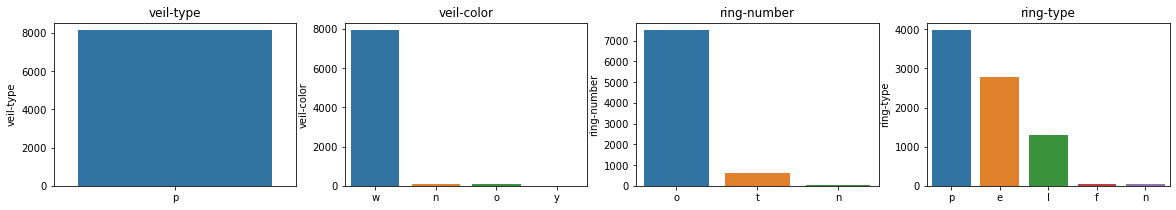

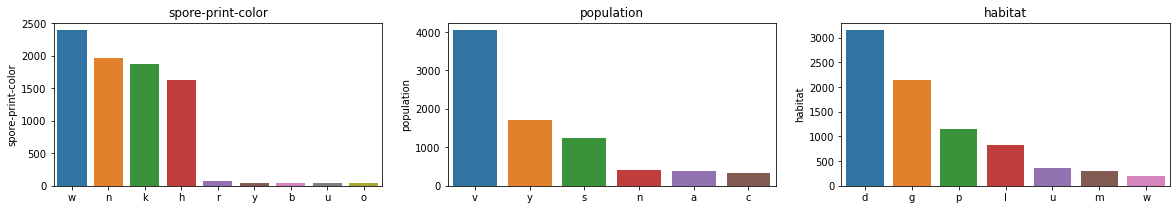

In [5]:
# variables 17-23
figure(figsize=(20, 3))
for i in range(16,20):
    plt.subplot(1, 4, i-15)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(20,23):
    plt.subplot(1, 3, i-19)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

Veil-type has only one category, which will not contribute to our modeling. We will drop it. The veil-color is the response variable, but it is very imbalanced. So the model will not be evaluated not by only one metric. The ring-number and ring-type also show some rarely seen categories. Spore-print-color has 5 colors that show fewer observations.

#### Explanatory variables and response variable relationship
Take the crosstabs for the relationship between each of the explanatory variables and the response variable 'veil-color'. Each of the barplots show the RATIO of the explanatory variable's features to the response variable. Based on the analysis, cap-shape, gill-attachment, gill-color, stalk-color-above-ring, stalk-color-below-ring, and spore-print-color cause significant variation in the response variables, veil-color. For example, a 'stalk-color-above-ring' of 'y' leads to a yellow veil-color 100% of the time. See barplots below for further examples.

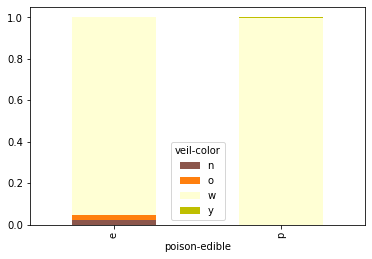

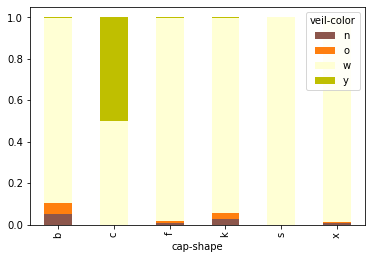

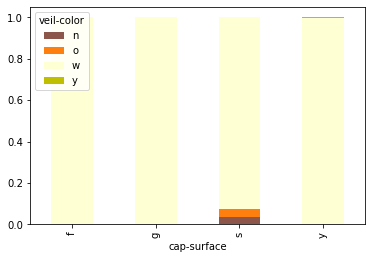

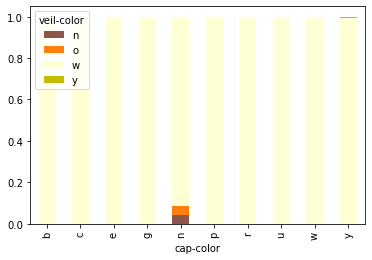

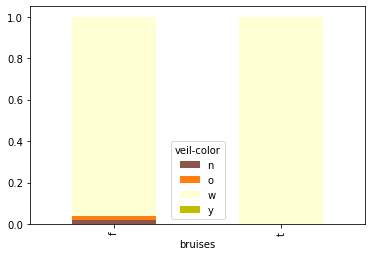

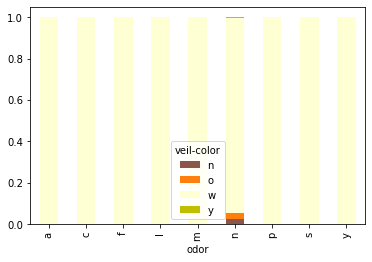

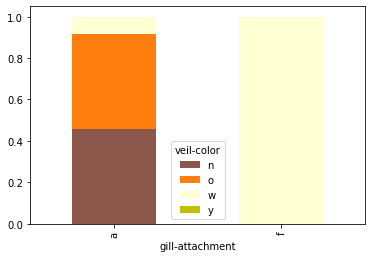

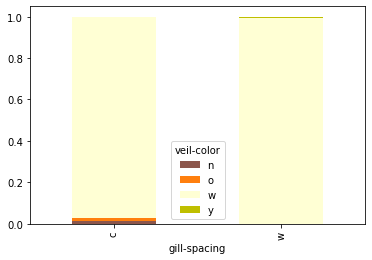

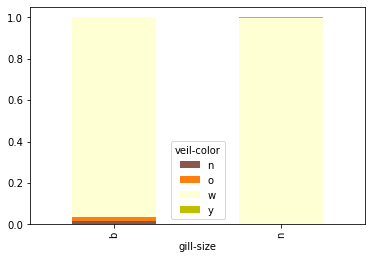

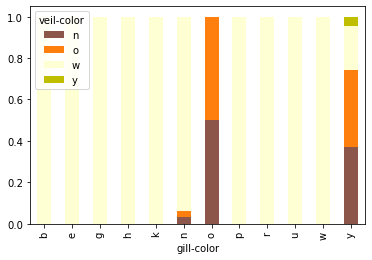

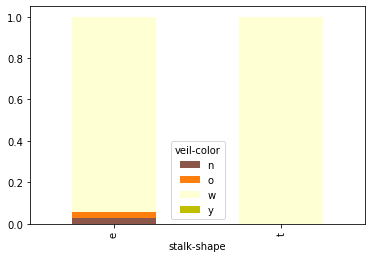

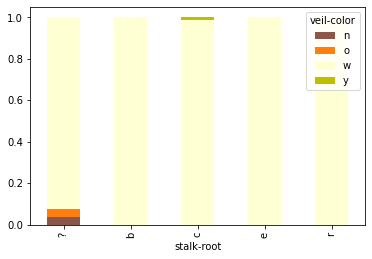

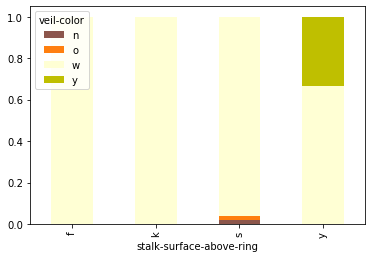

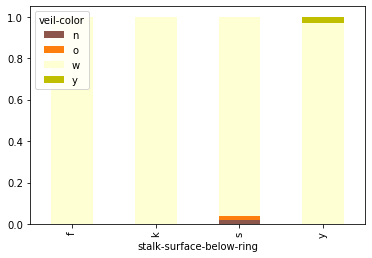

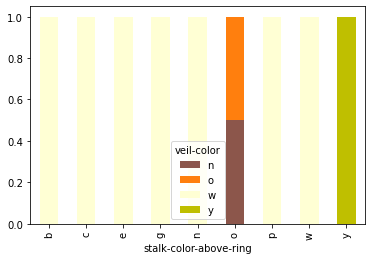

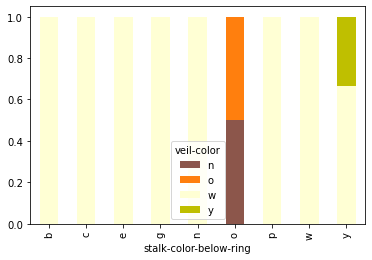

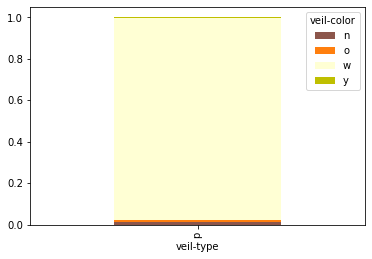

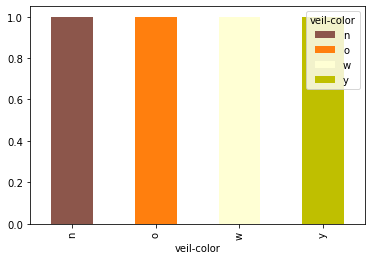

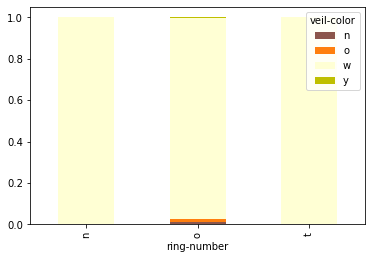

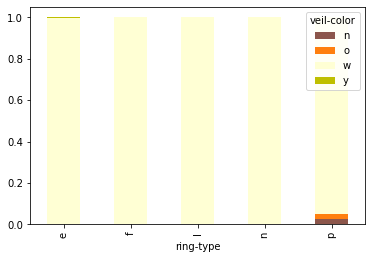

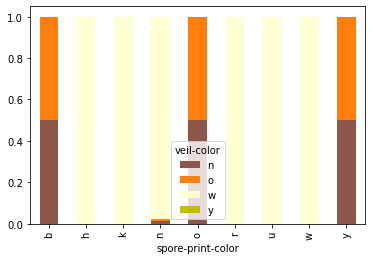

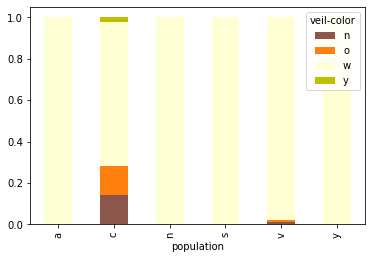

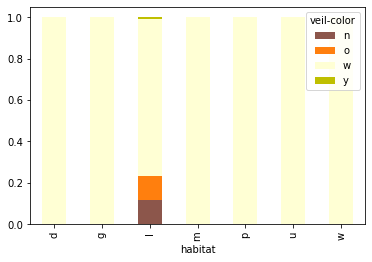

In [6]:
for col in df.columns:
    pd.crosstab(df[col], df['veil-color']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked = True, color = ['tab:brown', 'tab:orange', 'xkcd:eggshell', 'y'])    

## 3. Data Preparation
### Delete columns
As we mentioned in EDA, we will drop the column 'veil-type', which will not contribute to our future modeling.

In [7]:
# For simplify our running code, we will reload the data again 
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
# drop the useless columns
# Dropping veil-type because there is only 1 category of observation
df=df.drop(['veil-type'],axis=1)

### Split the independent variables and dependent variable
For dealing with the independent variables, we will separate the dependent variable from them temporarily.

In [8]:
# dependent variable separation
df_response=df[['veil-color']]
df_independent=df.copy().drop(['veil-color'],axis=1)

### Scale all categorical variables
As all independent variable candidates are nominal categorical values, we will apply hot encode for future modeling. The variables with 2 categories will be dropped one column after hot encoding as information duplication.

In [9]:
# hot encode the independent variables
df_independent=pd.get_dummies(df_independent, prefix=None)

In [10]:
# drop duplicate info columns
df_independent_dk=df_independent.drop(['poison-edible_p','bruises_t','gill-attachment_a','gill-spacing_w','gill-size_n','stalk-shape_e'],axis=1)

In [11]:
# combine independent variables and response variable with sanity check
df_new=pd.concat([df_response,df_independent_dk],axis=1)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', None)
df_new.head()

,veil-color,poison-edible_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,w,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,w,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,w,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,w,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,w,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## 4. Prepped Data Review

The data has been unchanged in the data preparation, except for removing the veil-type column with only 1 type of observation. Dummy variables were created as well. The feature analysis will be the same as the Section 2. EDA. But as hot encoding applied, the value counts of each new variables with encoded names can be seen as below.

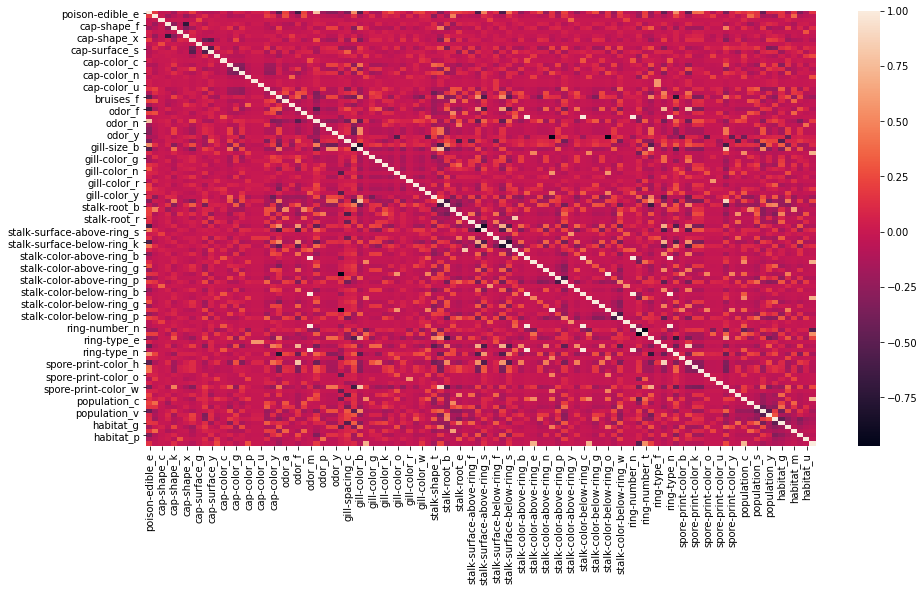

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df_independent_dk.corr())
plt.show()

Most of the variables after hot-encoding shows less than 0.5 correlation coefficient. It means the transformed could be generally seen as independent. 

## 5. Decision Tree & Random Forest Modeling

- 1. The first way of feature selection will be based on the crosstab analysis between all the explanatory variables and Veil Color. According to the EDA, gill-attachment, gill-color, cap-shape, stalk-color-above-ring and spore-print-color cause significant variation in the response variables, veil-color. We will use these attributes to train the model.

- 2. The second feature selection method we used is sklearn's mutual info classif as below:

In [13]:
'''**********************************
https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028
*************************************'''
# import libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
# define the variables
X = df_independent_dk
y = df_new['veil-color']
# split variables
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

# apply feature selection
sel_classif = SelectKBest(mutual_info_classif, k=5)
X_train_mutual = sel_classif.fit_transform(X_train, y_train)
print(sel_classif.get_support())

selected_feat_classif= X_train.columns[(sel_classif.get_support())]
print(selected_feat_classif)

[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False]
Index(['cap-color_n', 'gill-attachment_f', 'stalk-color-above-ring_o',
       'stalk-color-below-ring_o', 'habitat_l'],
      dtype='object')


Based on the feature selection above by mutual information classification, we identify 'gill-attachment_f', 'gill-color_o', 'stalk-color-above-ring_o', 'population_c', 'habitat_l' as relevant features for the response variables. We will take the full features for the modeling, not simply the individual dummy variables.

In [14]:
#extract relevant columns for two types of feature selections:
df_domainknowledge = df[['gill-attachment', 'gill-color', 'stalk-color-above-ring', 'spore-print-color', 'cap-shape']]
df_mutualinfo = df[['gill-attachment', 'stalk-root', 'stalk-color-above-ring','stalk-color-below-ring', 'habitat']]

In [15]:
# hot encode the independent variables
df_dummies = pd.get_dummies(df_domainknowledge, prefix=None)
df_dummies2 = pd.get_dummies(df_mutualinfo, prefix=None)

## 5. Decision Tree + Random Forest Modeling

In [16]:
# Null Error Rate if we predict every flower to be white veil-color:
y.value_counts()[0]/ y.value_counts().sum()

0.9753815854258986

#### Decision Tree Model with features identified from EDA

In [17]:
from sklearn.model_selection import train_test_split
# set the explanatory variables and response variable
X = df_dummies
y = df_new['veil-color']
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

# set classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

# import the cross_val_score function
from sklearn.model_selection import cross_val_score
scores_1_acc = cross_val_score(clf, X_1_train, y_1_train, cv=5, scoring='accuracy')

# fit the model checking the other metrics
clf.fit(X_1_train, y_1_train)
predict_1 = clf.predict(X_1_train)

print ("Accuracy:"+str(scores_1_acc.mean()))

from sklearn.metrics import f1_score, precision_score, recall_score
print('f1 Score on train data: ', f1_score(y_true=y_1_train, y_pred=clf.predict(X_1_train), average='weighted'))
print('Recall Score on train data: ', recall_score(y_true=y_1_train, y_pred=clf.predict(X_1_train), average='weighted'))
print('Precision Score on train data: ', precision_score(y_true=y_1_train, y_pred=clf.predict(X_1_train), average='weighted'))

from sklearn.metrics import classification_report

print(classification_report(y_true=y_1_train, y_pred=clf.predict(X_1_train)))

print(pd.Series(predict_1).value_counts())

Accuracy:0.9847364727339833
f1 Score on train data:  0.989610736797385
Recall Score on train data:  0.9908091252256688
Precision Score on train data:  0.9915736204284341
              precision    recall  f1-score   support

           n       0.58      0.91      0.71        76
           o       0.70      0.25      0.36        65
           w       1.00      1.00      1.00      5948
           y       1.00      1.00      1.00         4

    accuracy                           0.99      6093
   macro avg       0.82      0.79      0.77      6093
weighted avg       0.99      0.99      0.99      6093

w    5948
n     118
o      23
y       4
dtype: int64


#### Random Forest Model with features identified from EDA

In [19]:
from sklearn.ensemble import RandomForestClassifier
# set the explanatory variables and response variable
X = df_dummies
y = df_new['veil-color']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X, y, random_state = 47, test_size = 0.25)
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
scores_2_acc = cross_val_score(rfc, X_2_train, y_2_train, cv=5, scoring='accuracy')

# fit the model
rfc.fit(X_2_train, y_2_train)
predict_2 = rfc.predict(X_2_train)

# model scores
print ("Accuracy:"+str(scores_2_acc.mean()))

print('f1 Score on train data: ', f1_score(y_true=y_2_train, y_pred= predict_2, average='micro'))
print('Recall Score on train data: ', recall_score(y_true=y_2_train, y_pred = predict_2, average='micro'))
print('Precision Score on train data: ', precision_score(y_true=y_2_train, y_pred = predict_2, average='micro'))

from sklearn.metrics import classification_report

print(classification_report(y_true=y_2_train, y_pred = predict_2))

print(pd.Series(predict_2).value_counts())

Accuracy:0.9840799276911408
f1 Score on train data:  0.9908091252256688
Recall Score on train data:  0.9908091252256688
Precision Score on train data:  0.9908091252256688
              precision    recall  f1-score   support

           n       0.64      0.62      0.63        76
           o       0.57      0.58      0.58        65
           w       1.00      1.00      1.00      5948
           y       1.00      1.00      1.00         4

    accuracy                           0.99      6093
   macro avg       0.80      0.80      0.80      6093
weighted avg       0.99      0.99      0.99      6093

w    5948
n      74
o      67
y       4
dtype: int64


#### Decision Tree Model with features selected from sklearn mutual info classifier

In [20]:
from sklearn.model_selection import train_test_split
# set the explanatory variables and response variable
X = df_dummies2
y = df_new['veil-color']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X, y, random_state = 47, test_size = 0.25)
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion = 'entropy')
scores_3_acc = cross_val_score(clf2, X_3_train, y_3_train, cv=5, scoring='accuracy')
# fit the model
clf2.fit(X_3_train, y_3_train)
predict_3 = clf2.predict(X_3_train)

# model scores
print ("Accuracy:"+str(scores_3_acc.mean()))
print('f1 Score on train data: ', f1_score(y_true=y_3_train, y_pred=clf2.predict(X_3_train), average='micro'))
print('Recall Score on train data: ', recall_score(y_true=y_3_train, y_pred=clf2.predict(X_3_train), average='micro'))
print('Precision Score on train data: ', precision_score(y_true=y_3_train, y_pred=clf2.predict(X_3_train), average='micro'))

from sklearn.metrics import classification_report
print(classification_report(y_true=y_3_train, y_pred = predict_3))

print(pd.Series(predict_3).value_counts())

Accuracy:0.9893320186268051
f1 Score on train data:  0.9893320203512227
Recall Score on train data:  0.9893320203512227
Precision Score on train data:  0.9893320203512227
              precision    recall  f1-score   support

           n       0.54      1.00      0.70        76
           o       0.00      0.00      0.00        65
           w       1.00      1.00      1.00      5948
           y       1.00      1.00      1.00         4

    accuracy                           0.99      6093
   macro avg       0.63      0.75      0.68      6093
weighted avg       0.98      0.99      0.99      6093

w    5948
n     141
y       4
dtype: int64


#### Random Forest Model with features selected from sklearn mutual info classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
# set the explanatory variables and response variable
X = df_dummies2
y = df_new['veil-color']
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X, y, random_state = 47, test_size = 0.25)
# instantiate the classifier 
rfc2 = RandomForestClassifier(random_state=0)
scores_4_acc = cross_val_score(rfc2, X_4_train, y_4_train, cv=5, scoring='accuracy')

# fit the model
rfc2.fit(X_4_train, y_4_train)
predict_4 = rfc2.predict(X_4_train)

print ("Accuracy:"+str(scores_4_acc.mean()))
print('f1 Score on train data: ', f1_score(y_true=y_4_train, y_pred  = predict_4, average='micro'))

print('Recall Score on train data: ', recall_score(y_true=y_4_train, y_pred = predict_4, average='micro'))
print('Precision Score on train data: ', precision_score(y_true=y_4_train, y_pred = predict_4, average='micro'))

from sklearn.metrics import classification_report
print(classification_report(y_true=y_4_train, y_pred = predict_4))\

print(pd.Series(predict_4).value_counts())

Accuracy:0.9893320186268051
f1 Score on train data:  0.9893320203512227
Recall Score on train data:  0.9893320203512227
Precision Score on train data:  0.9893320203512227
              precision    recall  f1-score   support

           n       0.54      1.00      0.70        76
           o       0.00      0.00      0.00        65
           w       1.00      1.00      1.00      5948
           y       1.00      1.00      1.00         4

    accuracy                           0.99      6093
   macro avg       0.63      0.75      0.68      6093
weighted avg       0.98      0.99      0.99      6093

w    5948
n     141
y       4
dtype: int64


## 6. Model Selection

The random forest and decision tree models all have high accuracy, which is higher than the null error rate 0.9754. While for the models with the features identified from EDA, both of the models have nice performance for predicting the category 'o'. Also, these two models have a slightly higher overall accuracy than the other 2 models. Usually this is not enough difference to make a decision but based on our research of both algorithms random forest is an algorithm independent of the features due to its randomness, and therefore a better case for our study. A random forest is a collection of decision trees which condenses the result into one output and therefore could lead to higher differences on the metrics in future studies. We will apply random forest model with features identified from EDA as the model to predict the testing set.

In [22]:
# get prediction of testing set 
predict_test = rfc.predict(X_2_test)

# prediction scores
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_2_test, y_pred=predict_test))
print('f1 Score on train data: ', f1_score(y_true=y_2_test, y_pred= predict_test, average='micro'))

print('Recall Score on train data: ', recall_score(y_true=y_2_test, y_pred = predict_test, average='micro'))
print('Precision Score on train data: ', precision_score(y_true=y_2_test, y_pred = predict_test, average='micro'))

print(classification_report(y_true=y_2_test, y_pred = predict_test))

print(pd.Series(predict_test).value_counts())

Accuracy Score on train data:  0.9803052683407188
f1 Score on train data:  0.9803052683407188
Recall Score on train data:  0.9803052683407188
Precision Score on train data:  0.9803052683407188
              precision    recall  f1-score   support

           n       0.12      0.15      0.13        20
           o       0.32      0.26      0.29        31
           w       1.00      1.00      1.00      1976
           y       1.00      1.00      1.00         4

    accuracy                           0.98      2031
   macro avg       0.61      0.60      0.60      2031
weighted avg       0.98      0.98      0.98      2031

w    1976
n      26
o      25
y       4
dtype: int64


The model performs not very well on the testing set overall, especially the 'w' (white) and 'y'(yellow) are predicted perfectly. However, the brown 'n' and orange 'o' veil color care not predicted very well, no matter the recall or the precision. It shows the similar pattern as the training set, that 'n' and 'o' precision and recall are no reaching 0.7.

## 7. Conclusions
The random forest model for mushroom veil color classification can be created with 5 categorical variables selected based on previous exploratory data analysis. The over all accuracy can reach 98%. Due to the imbalance of the veil color, the majority of values can be predicted very well, while the fewer observation categories (minority) have a fair performance with lack of sensitivity and precision.